Se carga el dataset que se utilizara

In [1]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('potatoeseries03.csv', header=None))
print(dataset.head)

<bound method NDFrame.head of               0
0      8.000000
1      8.000000
2      8.000000
3      8.000000
4      9.000000
5      9.000000
6      9.000000
7      9.000000
8      9.000000
9      9.000000
10     9.000000
11     9.000000
12     9.000000
13     9.000000
14     9.000000
15     9.000000
16     9.000000
17     9.000000
18     9.000000
19     9.000000
20     9.000000
21     8.500000
22     8.000000
23     8.000000
24     8.500000
25     8.500000
26     8.500000
27     8.500000
28     8.500000
29     8.333333
...         ...
2059  15.000000
2060  15.000000
2061  15.000000
2062  15.000000
2063  15.000000
2064  15.000000
2065  15.000000
2066  15.000000
2067  15.000000
2068  15.000000
2069  15.000000
2070  15.000000
2071  15.000000
2072  15.000000
2073  15.000000
2074  15.000000
2075  15.000000
2076  15.000000
2077  12.000000
2078  12.000000
2079  12.000000
2080  12.000000
2081  12.000000
2082  12.000000
2083  12.000000
2084  12.000000
2085  12.000000
2086  12.000000
2087  12.0

Se aplica media movil en los datos.

In [2]:
from matplotlib import pyplot

dataset_soft = dataset.rolling(window=8, min_periods=1).mean()

pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150], label='Input')
pyplot.plot(dataset_soft[1:150], label='Soft')
pyplot.title('Media móvil Aplicada')
pyplot.legend()
pyplot.show()

<Figure size 5760x1920 with 1 Axes>

Se define el tamaño de ventana que tendra la serie de tiempos, y se transforma a una colección de datos para el entrenamiento supervisado del modelo.

In [3]:
import Tools as tls

size = 5

dataset_serialized = tls.series_to_supervised(dataset_soft,size, n_out=1, dropnan = True)
print(dataset_serialized)

      var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    var1(t)
5      8.000000   8.000000   8.000000   8.000000   8.200000   8.333333
6      8.000000   8.000000   8.000000   8.200000   8.333333   8.428571
7      8.000000   8.000000   8.200000   8.333333   8.428571   8.500000
8      8.000000   8.200000   8.333333   8.428571   8.500000   8.625000
9      8.200000   8.333333   8.428571   8.500000   8.625000   8.750000
10     8.333333   8.428571   8.500000   8.625000   8.750000   8.875000
11     8.428571   8.500000   8.625000   8.750000   8.875000   9.000000
12     8.500000   8.625000   8.750000   8.875000   9.000000   9.000000
13     8.625000   8.750000   8.875000   9.000000   9.000000   9.000000
14     8.750000   8.875000   9.000000   9.000000   9.000000   9.000000
15     8.875000   9.000000   9.000000   9.000000   9.000000   9.000000
16     9.000000   9.000000   9.000000   9.000000   9.000000   9.000000
17     9.000000   9.000000   9.000000   9.000000   9.000000   9.000000
18    

Se normalizan los datos entre 0 y 1

In [4]:
from sklearn import preprocessing

datasetnorm = preprocessing.minmax_scale(dataset_serialized, feature_range=(0, 1))
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm)

             0         1         2         3         4         5
0     0.179487  0.179487  0.179487  0.179487  0.189744  0.196581
1     0.179487  0.179487  0.179487  0.189744  0.196581  0.201465
2     0.179487  0.179487  0.189744  0.196581  0.201465  0.205128
3     0.179487  0.189744  0.196581  0.201465  0.205128  0.211538
4     0.189744  0.196581  0.201465  0.205128  0.211538  0.217949
5     0.196581  0.201465  0.205128  0.211538  0.217949  0.224359
6     0.201465  0.205128  0.211538  0.217949  0.224359  0.230769
7     0.205128  0.211538  0.217949  0.224359  0.230769  0.230769
8     0.211538  0.217949  0.224359  0.230769  0.230769  0.230769
9     0.217949  0.224359  0.230769  0.230769  0.230769  0.230769
10    0.224359  0.230769  0.230769  0.230769  0.230769  0.230769
11    0.230769  0.230769  0.230769  0.230769  0.230769  0.230769
12    0.230769  0.230769  0.230769  0.230769  0.230769  0.230769
13    0.230769  0.230769  0.230769  0.230769  0.230769  0.230769
14    0.230769  0.230769 

Preparamos los datos para alimentar la red para entrenamiento y prueba.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values
X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)
print (X_train.shape, y_train.shape)

(1458, 5) (1458, 1)


Se define nuestro modelo, con un numero de "vecinos" deseados a utilizarse, y se entrena

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=12, p=2,
          weights='uniform')

Realizamos predicción de valores de prueba, y comparamos con valores reales utilizando el error cuadratico medio.

In [43]:
from sklearn.metrics import mean_squared_error

pred = knn.predict(X_test)
MSE = mean_squared_error(y_test, pred)

print ('MSE '+ str(MSE))

MSE 9.1056969703389e-05


Se imprime grafica

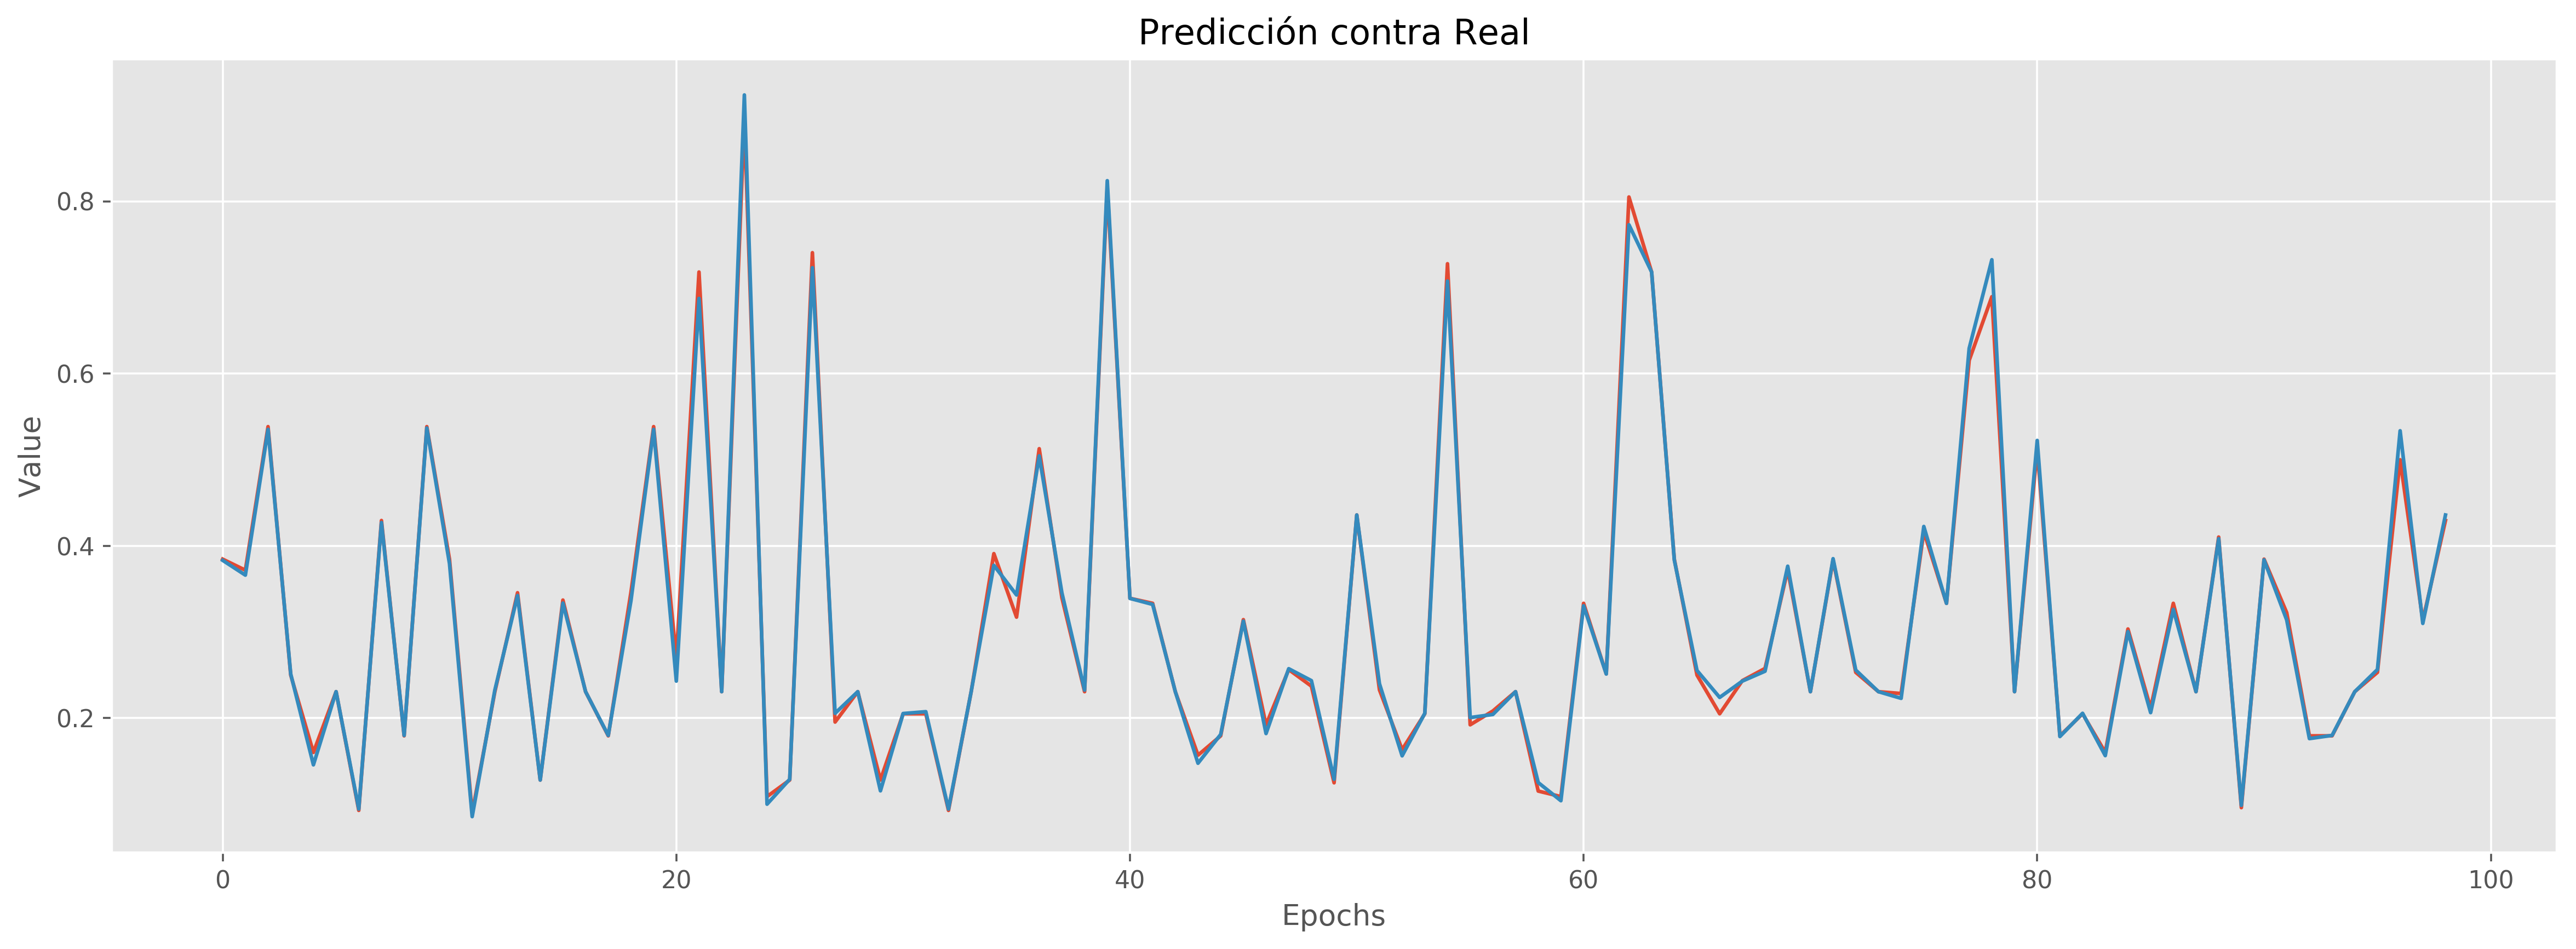

In [44]:
pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[1:100,]) #Valores ajustables para grafica
pyplot.plot(pred[1:100,])
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.title('Predicción contra Real')
pyplot.show()

En este paso, realizaremos entrenamiento con multiples valores de vecinos, para buscar un parametro de vecinos que nos de resultado con mejor aptitud.

In [1]:
import pandas
import csv
import psycopg2
from datetime import datetime
df = pandas.read_csv('potatoeseries.csv',header=None)

##Se eliminan las columnas que no son necesarias y se reacomoda el dataframe
df = df.drop(columns=[1, 2, 3, 4], axis=1)
df.columns = range(df.shape[1])

for index,row in df.iterrows():
    print(row)
    row[1] = pandas.to_numeric(row[1], errors='coerce')
    if datetime.strptime(row[0], '%Y-%m-%d').weekday() == 5 or datetime.strptime(row[0], '%Y-%m-%d').weekday() == 6 :
        df = df.drop([index],axis=0)
        continue
    
df = df.interpolate()
#df = df.reset_index(drop=True)

records_to_insert = []

for index,row in df.iterrows():
    records_to_insert.append(tuple((row[0], row[1], 1, 40, 1)))

#print(records_to_insert)


def bulkInsert(records):
    try:
        connection = psycopg2.connect(user = "postgres", password = "r351d3nc14501", host = "127.0.0.1", port = "5432", database = "potatoe_markets")
        cursor = connection.cursor()
        sql_insert_query = """ INSERT INTO normalized_price (sniimdate, price, sourcemarketid, endmarketid, potatoid) VALUES (%s, %s, %s, %s, %s) """
        # executemany() to insert multiple rows rows
        result = cursor.executemany(sql_insert_query, records)
        connection.commit()
        print(cursor.rowcount, "Record inserted successfully into mobile table")
    except (Exception, psycopg2.Error) as error:
        print("Failed inserting record into mobile table {}".format(error))
    finally:
        # closing database connection.
        if (connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")
#bulkInsert(records_to_insert)

#df.to_csv("potatoeseries01.csv",index=False,encoding='utf8',header=False, na_rep='NULL')

0    2010-11-08
1             8
Name: 0, dtype: object
0    2010-11-09
1             8
Name: 1, dtype: object
0    2010-11-10
1             8
Name: 2, dtype: object
0    2010-11-11
1             8
Name: 3, dtype: object
0    2010-11-12
1             9
Name: 4, dtype: object
0    2010-11-13
1           NaN
Name: 5, dtype: object
0    2010-11-14
1           NaN
Name: 6, dtype: object
0    2010-11-15
1           NaN
Name: 7, dtype: object
0    2010-11-16
1             9
Name: 8, dtype: object
0    2010-11-17
1             9
Name: 9, dtype: object
0    2010-11-18
1             9
Name: 10, dtype: object
0    2010-11-19
1             9
Name: 11, dtype: object
0    2010-11-20
1           NaN
Name: 12, dtype: object
0    2010-11-21
1           NaN
Name: 13, dtype: object
0    2010-11-22
1             9
Name: 14, dtype: object
0    2010-11-23
1             9
Name: 15, dtype: object
0    2010-11-24
1             9
Name: 16, dtype: object
0    2010-11-25
1             9
Name: 17, dtype: object
0 

0    2011-07-17
1           NaN
Name: 251, dtype: object
0    2011-07-18
1           7.5
Name: 252, dtype: object
0    2011-07-19
1             8
Name: 253, dtype: object
0    2011-07-20
1             8
Name: 254, dtype: object
0    2011-07-21
1             8
Name: 255, dtype: object
0    2011-07-22
1           NaN
Name: 256, dtype: object
0    2011-07-23
1           NaN
Name: 257, dtype: object
0    2011-07-24
1           NaN
Name: 258, dtype: object
0    2011-07-25
1             8
Name: 259, dtype: object
0    2011-07-26
1           NaN
Name: 260, dtype: object
0    2011-07-27
1             7
Name: 261, dtype: object
0    2011-07-28
1             7
Name: 262, dtype: object
0    2011-07-29
1             7
Name: 263, dtype: object
0    2011-07-30
1           NaN
Name: 264, dtype: object
0    2011-07-31
1           NaN
Name: 265, dtype: object
0    2011-08-01
1             7
Name: 266, dtype: object
0    2011-08-02
1             7
Name: 267, dtype: object
0    2011-08-03
1             7

Name: 504, dtype: object
0    2012-03-27
1             6
Name: 505, dtype: object
0    2012-03-28
1           4.5
Name: 506, dtype: object
0    2012-03-29
1           4.5
Name: 507, dtype: object
0    2012-03-30
1           4.5
Name: 508, dtype: object
0    2012-03-31
1           NaN
Name: 509, dtype: object
0    2012-04-01
1           NaN
Name: 510, dtype: object
0    2012-04-02
1           4.5
Name: 511, dtype: object
0    2012-04-03
1           4.5
Name: 512, dtype: object
0    2012-04-04
1           4.5
Name: 513, dtype: object
0    2012-04-05
1           NaN
Name: 514, dtype: object
0    2012-04-06
1           NaN
Name: 515, dtype: object
0    2012-04-07
1           NaN
Name: 516, dtype: object
0    2012-04-08
1           NaN
Name: 517, dtype: object
0    2012-04-09
1           4.5
Name: 518, dtype: object
0    2012-04-10
1           5.5
Name: 519, dtype: object
0    2012-04-11
1           5.5
Name: 520, dtype: object
0    2012-04-12
1           5.5
Name: 521, dtype: object
0    2

Name: 770, dtype: object
0    2012-12-18
1             6
Name: 771, dtype: object
0    2012-12-19
1             6
Name: 772, dtype: object
0    2012-12-20
1             6
Name: 773, dtype: object
0    2012-12-21
1             6
Name: 774, dtype: object
0    2012-12-22
1           NaN
Name: 775, dtype: object
0    2012-12-23
1           NaN
Name: 776, dtype: object
0    2012-12-24
1             6
Name: 777, dtype: object
0    2012-12-25
1           NaN
Name: 778, dtype: object
0    2012-12-26
1             6
Name: 779, dtype: object
0    2012-12-27
1             6
Name: 780, dtype: object
0    2012-12-28
1             6
Name: 781, dtype: object
0    2012-12-29
1           NaN
Name: 782, dtype: object
0    2012-12-30
1           NaN
Name: 783, dtype: object
0    2012-12-31
1             6
Name: 784, dtype: object
0    2013-01-01
1           NaN
Name: 785, dtype: object
0    2013-01-02
1             6
Name: 786, dtype: object
0    2013-01-03
1             6
Name: 787, dtype: object
0    2

Name: 1029, dtype: object
0    2013-09-03
1            10
Name: 1030, dtype: object
0    2013-09-04
1            10
Name: 1031, dtype: object
0    2013-09-05
1            10
Name: 1032, dtype: object
0    2013-09-06
1            10
Name: 1033, dtype: object
0    2013-09-07
1           NaN
Name: 1034, dtype: object
0    2013-09-08
1           NaN
Name: 1035, dtype: object
0    2013-09-09
1            10
Name: 1036, dtype: object
0    2013-09-10
1             9
Name: 1037, dtype: object
0    2013-09-11
1             9
Name: 1038, dtype: object
0    2013-09-12
1             9
Name: 1039, dtype: object
0    2013-09-13
1             9
Name: 1040, dtype: object
0    2013-09-14
1           NaN
Name: 1041, dtype: object
0    2013-09-15
1           NaN
Name: 1042, dtype: object
0    2013-09-16
1           NaN
Name: 1043, dtype: object
0    2013-09-17
1             9
Name: 1044, dtype: object
0    2013-09-18
1            10
Name: 1045, dtype: object
0    2013-09-19
1            10
Name: 1046, dt

Name: 1301, dtype: object
0    2014-06-02
1            12
Name: 1302, dtype: object
0    2014-06-03
1            12
Name: 1303, dtype: object
0    2014-06-04
1            12
Name: 1304, dtype: object
0    2014-06-05
1            12
Name: 1305, dtype: object
0    2014-06-06
1            12
Name: 1306, dtype: object
0    2014-06-07
1           NaN
Name: 1307, dtype: object
0    2014-06-08
1           NaN
Name: 1308, dtype: object
0    2014-06-09
1            12
Name: 1309, dtype: object
0    2014-06-10
1            12
Name: 1310, dtype: object
0    2014-06-11
1            12
Name: 1311, dtype: object
0    2014-06-12
1            12
Name: 1312, dtype: object
0    2014-06-13
1            12
Name: 1313, dtype: object
0    2014-06-14
1           NaN
Name: 1314, dtype: object
0    2014-06-15
1           NaN
Name: 1315, dtype: object
0    2014-06-16
1            12
Name: 1316, dtype: object
0    2014-06-17
1            12
Name: 1317, dtype: object
0    2014-06-18
1            12
Name: 1318, dt

Name: 1579, dtype: object
0    2015-03-07
1           NaN
Name: 1580, dtype: object
0    2015-03-08
1           NaN
Name: 1581, dtype: object
0    2015-03-09
1          13.5
Name: 1582, dtype: object
0    2015-03-10
1            12
Name: 1583, dtype: object
0    2015-03-11
1            12
Name: 1584, dtype: object
0    2015-03-12
1            12
Name: 1585, dtype: object
0    2015-03-13
1            12
Name: 1586, dtype: object
0    2015-03-14
1           NaN
Name: 1587, dtype: object
0    2015-03-15
1           NaN
Name: 1588, dtype: object
0    2015-03-16
1           NaN
Name: 1589, dtype: object
0    2015-03-17
1            12
Name: 1590, dtype: object
0    2015-03-18
1            11
Name: 1591, dtype: object
0    2015-03-19
1            11
Name: 1592, dtype: object
0    2015-03-20
1            11
Name: 1593, dtype: object
0    2015-03-21
1           NaN
Name: 1594, dtype: object
0    2015-03-22
1           NaN
Name: 1595, dtype: object
0    2015-03-23
1            11
Name: 1596, dt

Name: 1848, dtype: object
0    2015-12-01
1            10
Name: 1849, dtype: object
0    2015-12-02
1            10
Name: 1850, dtype: object
0    2015-12-03
1            10
Name: 1851, dtype: object
0    2015-12-04
1            10
Name: 1852, dtype: object
0    2015-12-05
1           NaN
Name: 1853, dtype: object
0    2015-12-06
1           NaN
Name: 1854, dtype: object
0    2015-12-07
1            10
Name: 1855, dtype: object
0    2015-12-08
1            10
Name: 1856, dtype: object
0    2015-12-09
1            10
Name: 1857, dtype: object
0    2015-12-10
1            10
Name: 1858, dtype: object
0    2015-12-11
1            10
Name: 1859, dtype: object
0    2015-12-12
1           NaN
Name: 1860, dtype: object
0    2015-12-13
1           NaN
Name: 1861, dtype: object
0    2015-12-14
1            10
Name: 1862, dtype: object
0    2015-12-15
1            10
Name: 1863, dtype: object
0    2015-12-16
1            10
Name: 1864, dtype: object
0    2015-12-17
1            10
Name: 1865, dt

0    2016-09-04
1           NaN
Name: 2127, dtype: object
0    2016-09-05
1             8
Name: 2128, dtype: object
0    2016-09-06
1             8
Name: 2129, dtype: object
0    2016-09-07
1             8
Name: 2130, dtype: object
0    2016-09-08
1             8
Name: 2131, dtype: object
0    2016-09-09
1             8
Name: 2132, dtype: object
0    2016-09-10
1           NaN
Name: 2133, dtype: object
0    2016-09-11
1           NaN
Name: 2134, dtype: object
0    2016-09-12
1             8
Name: 2135, dtype: object
0    2016-09-13
1             8
Name: 2136, dtype: object
0    2016-09-14
1             8
Name: 2137, dtype: object
0    2016-09-15
1             8
Name: 2138, dtype: object
0    2016-09-16
1           NaN
Name: 2139, dtype: object
0    2016-09-17
1           NaN
Name: 2140, dtype: object
0    2016-09-18
1           NaN
Name: 2141, dtype: object
0    2016-09-19
1             8
Name: 2142, dtype: object
0    2016-09-20
1             8
Name: 2143, dtype: object
0    2016-09-2

Name: 2403, dtype: object
0    2017-06-08
1            10
Name: 2404, dtype: object
0    2017-06-09
1            10
Name: 2405, dtype: object
0    2017-06-10
1           NaN
Name: 2406, dtype: object
0    2017-06-11
1           NaN
Name: 2407, dtype: object
0    2017-06-12
1            10
Name: 2408, dtype: object
0    2017-06-13
1            10
Name: 2409, dtype: object
0    2017-06-14
1            10
Name: 2410, dtype: object
0    2017-06-15
1            10
Name: 2411, dtype: object
0    2017-06-16
1            10
Name: 2412, dtype: object
0    2017-06-17
1           NaN
Name: 2413, dtype: object
0    2017-06-18
1           NaN
Name: 2414, dtype: object
0    2017-06-19
1            10
Name: 2415, dtype: object
0    2017-06-20
1            10
Name: 2416, dtype: object
0    2017-06-21
1            10
Name: 2417, dtype: object
0    2017-06-22
1            10
Name: 2418, dtype: object
0    2017-06-23
1            10
Name: 2419, dtype: object
0    2017-06-24
1           NaN
Name: 2420, dt

Name: 2669, dtype: object
0    2018-03-01
1            17
Name: 2670, dtype: object
0    2018-03-02
1            17
Name: 2671, dtype: object
0    2018-03-03
1           NaN
Name: 2672, dtype: object
0    2018-03-04
1           NaN
Name: 2673, dtype: object
0    2018-03-05
1            17
Name: 2674, dtype: object
0    2018-03-06
1            16
Name: 2675, dtype: object
0    2018-03-07
1            16
Name: 2676, dtype: object
0    2018-03-08
1            16
Name: 2677, dtype: object
0    2018-03-09
1            16
Name: 2678, dtype: object
0    2018-03-10
1           NaN
Name: 2679, dtype: object
0    2018-03-11
1           NaN
Name: 2680, dtype: object
0    2018-03-12
1            16
Name: 2681, dtype: object
0    2018-03-13
1            16
Name: 2682, dtype: object
0    2018-03-14
1            16
Name: 2683, dtype: object
0    2018-03-15
1            16
Name: 2684, dtype: object
0    2018-03-16
1            16
Name: 2685, dtype: object
0    2018-03-17
1           NaN
Name: 2686, dt

A la serie elegida se le aplicara una funcion inrterpolate para limpiar los huecos que pueda tener.

In [ ]:
import pandas
import csv
#from datetime import datetime

df = pandas.read_csv('potatoeseries02.csv',header=None)
for col in df:
    df[col] = pandas.to_numeric(df[col], errors='coerce')
df = df.interpolate()
df.to_csv("potatoeseries03.csv",index=False,encoding='utf8',header=False)
#total = 0
#for index,row in df.iterrows():
#    if datetime.strptime(row[0], '%d/%m/%Y').weekday() == 5 or datetime.strptime(row[0], '%d/%m/%Y').weekday() == 6 :
#        df = df.drop([index],axis=0)
#        continue
#    print(datetime.strptime(row[0], '%d/%m/%Y').weekday())
#    df.interpolate()
    ##if row[0] != 'null':
    ##    continue
    ##df = df.drop([index],axis=0)
#df.to_csv("potatoeseries01.csv",index=False,encoding='utf8',header=False)

In [31]:
#import pandas
#import csv
#from datetime import datetime

#df = pandas.read_csv('potatoeseries02.csv',header=None)
#for col in df:
#    df[col] = pandas.to_numeric(df[col], errors='coerce')
#df.dtypes
#print(df)
#df.interpolate()
#df.to_csv("potatoeseries03.csv",index=False,encoding='utf8',header=False)

0    float64
dtype: object